In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Model development

In [17]:
df1 = pd.read_csv("movie_data.csv")
df1

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
#average
averaged_runtime = np.mean(df1["Runtime"])
vec = df1["Runtime"]
for i in range(len(vec)):
    if (np.isnan(vec[i])):
        vec[i] = averaged_runtime
vec = np.array(vec)
vec = vec.reshape(-1,1)
scaler.fit(vec)
vec = scaler.transform(vec)
df1["Runtime"] = vec

/var/folders/2z/zx6mmm3n6c799sd_qdnt48s00000gn/T/ipykernel_68542/114245895.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vec[i] = averaged_runtime


In [20]:
vec = df1["Year"]
vec = max(df1["Year"])-df1["Year"]
df1["Year"] = vec

In [21]:
df1 = df1.drop(columns=["Rotten Tomatoes","Age","Type"])
df1 = df1.dropna()

In [22]:
# Add genres as categories and then merge the dataframes
country= df1['Country'].str.get_dummies(',')
df1 = pd.concat([df1, country],axis=1,sort=False)
del df1[df1. columns[-1]]

In [23]:
language = df1['Language'].str.get_dummies(',')
df1 = pd.concat([df1, language],axis=1,sort=False)
del df1[df1. columns[-1]]

In [24]:
import numpy as np
import pandas as pd
import multiprocessing
import math 
%pip install xgboost
import xgboost as xgb
from numpy import mean
from statistics import variance
from numpy import std
from sklearn.decomposition import PCA
from pandas import read_csv
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
from matplotlib import pyplot as plt 

Note: you may need to restart the kernel to use updated packages.


In [25]:
def model_assess(tuned_model,X_train,y_train,X_test,y_test):
    y_train_pred=tuned_model.predict(X_train)
    y_test_pred=tuned_model.predict(X_test)
    train_R2 = tuned_model.score(X_train, y_train)
    test_R2 = tuned_model.score(X_test, y_test)
    train_RMSE=round(math.sqrt(mean_squared_error(y_train_pred,y_train)),4)
    test_RMSE=round(math.sqrt(mean_squared_error(y_test_pred,y_test)),4)
    train_MAE=round(mae(y_train_pred,ytrain),4)
    test_MAE=round(mae(y_test_pred,ytest),4)
    return([train_R2,test_R2,train_RMSE,test_RMSE,train_MAE,test_MAE])

In [26]:
y = df1['IMDb']
X=df1.drop(columns=['ID','Title','IMDb','Directors','Genres','Country','Language'])
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=4011)

## Ordinary Least Squared

In [27]:
model_ols = LinearRegression().fit(Xtrain, ytrain)
ols_result=model_assess(model_ols,Xtrain,ytrain,Xtest,ytest)
ols_result

[0.3608684064512263,
 -27850027958096.273,
 1.0719,
 7133974.4877,
 0.8314,
 184777.7621]

## Lasso

In [28]:
model_lasso = LassoCV(cv=5, random_state=4011,n_jobs= 1,alphas=np.logspace(-6,-2,100),tol=1e-3,max_iter=1000000000).fit(Xtrain, ytrain)
lasso_result=model_assess(model_lasso,Xtrain,ytrain,Xtest,ytest)
lasso_result

[0.35145287264793756, 0.362916789753323, 1.0798, 1.079, 0.841, 0.8382]

In [29]:
# step 4: examine if coefficients are shrinked towards 0; only for Lasso and Ridge regression
print(list(zip(model_lasso.coef_, X))) 

[(0.009362606082739656, 'Year'), (0.3667661925161812, 'Netflix'), (0.32522043818384444, 'Hulu'), (-0.054513666918633324, 'Prime Video'), (0.6082368577313993, 'Disney+'), (0.25832242986794474, 'Runtime'), (-0.3801881949051493, 'Action'), (-0.136451641839069, 'Adventure'), (0.5474295947026333, 'Animation'), (0.2398378321130434, 'Biography'), (0.17743687383591283, 'Comedy'), (0.021083494546778245, 'Crime'), (1.3796538907919842, 'Documentary'), (0.35832169446356643, 'Drama'), (-0.09711358773648952, 'Family'), (-0.042603559158681734, 'Fantasy'), (0.36204980626082534, 'Film-Noir'), (0.0, 'Game-Show'), (0.16556584584746653, 'History'), (-0.7267960187473147, 'Horror'), (0.24608994429846773, 'Music'), (-0.03903809079455816, 'Musical'), (0.11667040443216624, 'Mystery'), (0.18704823066352144, 'News'), (0.0, 'Reality-TV'), (-0.045488827549751726, 'Romance'), (-0.3373074294368502, 'Sci-Fi'), (0.9051088473284908, 'Short'), (0.07236295078099446, 'Sport'), (-0.0, 'Talk-Show'), (-0.10599577118785738, '

## Ridge

In [30]:
model_ridge = RidgeCV(cv=5,alphas=np.logspace(-1,3,100)).fit(Xtrain, ytrain)
model_ridge.alpha_ 

12.61856883066021

In [31]:
ridge_result=model_assess(model_ridge,Xtrain,ytrain,Xtest,ytest)
ridge_result

[0.35278831022572266, 0.36383657507047973, 1.0787, 1.0782, 0.8402, 0.8374]

In [32]:
#examine if coefficients are shrinked 
print(list(zip(model_ridge.coef_, X))) 

[(0.009365338390470488, 'Year'), (0.3482781038327202, 'Netflix'), (0.30903320022770603, 'Hulu'), (-0.07458035595546166, 'Prime Video'), (0.5839855735949107, 'Disney+'), (0.25257731542785955, 'Runtime'), (-0.37981398763418706, 'Action'), (-0.13344298613250347, 'Adventure'), (0.5361583182756671, 'Animation'), (0.24057591531391873, 'Biography'), (0.17330118087629856, 'Comedy'), (0.02328128850320408, 'Crime'), (1.3617218483859537, 'Documentary'), (0.35384388131233474, 'Drama'), (-0.09702328606420002, 'Family'), (-0.04563515625905472, 'Fantasy'), (0.3401893012445619, 'Film-Noir'), (0.0, 'Game-Show'), (0.17116792816336712, 'History'), (-0.7258281304834835, 'Horror'), (0.2509983625047293, 'Music'), (-0.042658170374431446, 'Musical'), (0.11912204479405009, 'Mystery'), (0.1942568442856856, 'News'), (0.04305046357104234, 'Reality-TV'), (-0.04822555759274556, 'Romance'), (-0.3359479417249898, 'Sci-Fi'), (0.8595615308945199, 'Short'), (0.0805544057867454, 'Sport'), (-0.07776359196227678, 'Talk-Sho

## SVR (Epsilon-Support Vector Regression)

In [33]:
param_grid_svr = [
    {'kernel': ["linear","poly","rbf","sigmoid"]}]

select_model_svr = GridSearchCV(SVR(),param_grid_svr, n_jobs=1, cv=5,scoring='neg_mean_squared_error',
return_train_score=True)
select_model_svr.fit(Xtrain, ytrain)

model_svr = select_model_svr.best_estimator_
select_model_svr.best_params_

{'kernel': 'linear'}

In [34]:
svr_result= model_assess(model_svr,Xtrain,ytrain,Xtest,ytest)
svr_result 

[0.3502414631225379, 0.35947067377887776, 1.0808, 1.0819, 0.827, 0.8356]

## Decision Tree

In [35]:
param_grid_tree = {'max_depth':[25,30,35,40],'max_features': [60,70,80,90],'max_leaf_nodes': [350,400,450,500],
                   'min_samples_leaf': [3,4,5,6],'min_samples_split': [2,3,4]}

tree = DecisionTreeRegressor(random_state=4011)
select_model_tree = GridSearchCV(tree, param_grid_tree, n_jobs=-1, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True).fit(Xtrain, ytrain)

model_tree_reg = select_model_tree.best_estimator_
select_model_tree.best_params_

{'max_depth': 25,
 'max_features': 70,
 'max_leaf_nodes': 350,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [36]:
tree_reg_result = model_assess(model_tree_reg,Xtrain,ytrain,Xtest,ytest)
tree_reg_result

[0.40662898629974087, 0.33583237639424535, 1.0328, 1.1017, 0.7983, 0.851]

Text(0.5, 0, 'Feature Importance')

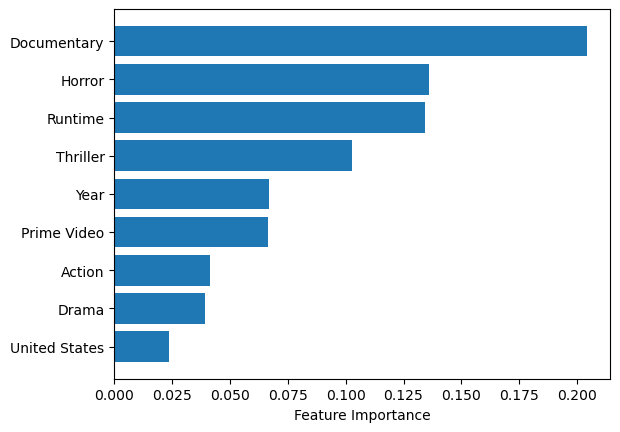

In [37]:
sort = model_tree_reg.feature_importances_.argsort()
feature_importance_sorted = model_tree_reg.feature_importances_[sort]
feature_sorted = X.columns[sort]
plt.barh(feature_sorted[360:370], feature_importance_sorted[360:370])
plt.xlabel("Feature Importance")

## Random Forest

In [49]:
param_grid_rfr = {'max_features': [10,20,30,40],'n_estimators': [200,400]} #128，132，136，140

forest_reg = RandomForestRegressor(random_state=4011,max_depth=30)
select_model_rfr = GridSearchCV(forest_reg, param_grid_rfr, n_jobs=-1, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True).fit(Xtrain, ytrain)

model_rfr = select_model_rfr.best_estimator_
select_model_rfr.best_params_

{'max_features': 30, 'n_estimators': 400}

In [50]:
rfr_result = model_assess(model_rfr,Xtrain,ytrain,Xtest,ytest)
rfr_result

[0.7730967911956466, 0.4373353208719818, 0.6387, 1.014, 0.4739, 0.7779]

Text(0.5, 0, 'Feature Importance')

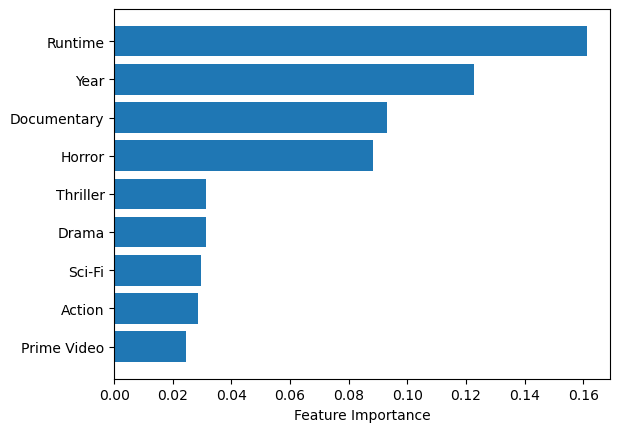

In [51]:
sort = model_rfr.feature_importances_.argsort()
feature_importance_sorted = model_rfr.feature_importances_[sort]
feature_sorted = X.columns[sort]
plt.barh(feature_sorted[360:370], feature_importance_sorted[360:370])
plt.xlabel("Feature Importance")

## Tree with AdaBoost

In [52]:
param_grid_ada = [
    {'learning_rate': np.logspace(-1,1,10),'n_estimators': [400,800]}
]

In [53]:
ada_reg=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=30),random_state=4011)

select_model_ada = GridSearchCV(ada_reg, param_grid_ada, n_jobs=-1, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True).fit(Xtrain, ytrain)

model_ada = select_model_ada.best_estimator_
select_model_ada.best_params_

{'learning_rate': 0.1, 'n_estimators': 800}

In [54]:
ada_result = model_assess(model_ada,Xtrain,ytrain,Xtest,ytest)
ada_result

[0.9023179768631121, 0.39006852294606487, 0.4191, 1.0557, 0.2571, 0.8023]

Text(0.5, 0, 'Feature Importance')

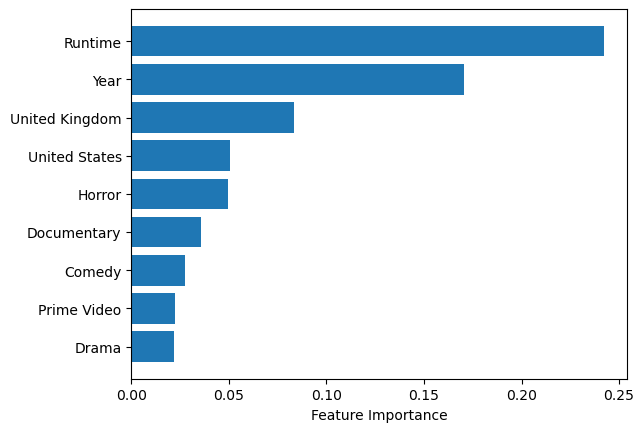

In [55]:
sort = model_ada.feature_importances_.argsort()
feature_importance_sorted = model_ada.feature_importances_[sort]
feature_sorted = X.columns[sort]
plt.barh(feature_sorted[360:370], feature_importance_sorted[360:370])
plt.xlabel("Feature Importance")

## Tree with Gradient boosting

In [45]:
param_grid_gb = [
    {'learning_rate':np.logspace(-2,0,10),'n_estimators':[130,150,170]}
]

In [46]:
GB_reg=GradientBoostingRegressor(max_depth=30)
select_model_GB = GridSearchCV(GB_reg, param_grid_gb, n_jobs=-1, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True).fit(Xtrain, ytrain)

model_GB = select_model_GB.best_estimator_
select_model_GB.best_params_

{'learning_rate': 0.01, 'n_estimators': 130}

In [47]:
GB_result = model_assess(model_GB,Xtrain,ytrain,Xtest,ytest)
GB_result

[0.8974089142911389, 0.18493336573494767, 0.4295, 1.2204, 0.3311, 0.9405]

Text(0.5, 0, 'Feature Importance')

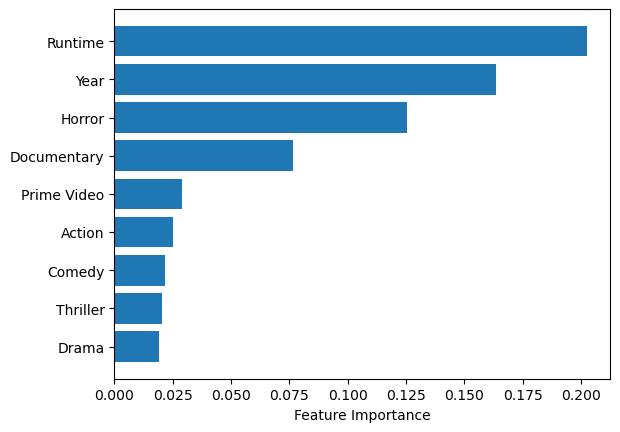

In [48]:
sort = model_GB.feature_importances_.argsort()
feature_importance_sorted = model_GB.feature_importances_[sort]
feature_sorted = X.columns[sort]
plt.barh(feature_sorted[360:370], feature_importance_sorted[360:370])
plt.xlabel("Feature Importance")